In [1]:
!nvidia-smi

Mon Dec  1 11:17:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.172.08             Driver Version: 570.172.08     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             27W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Install packages

In [2]:
!pip install --upgrade ultralytics roboflow
!pip install --upgrade --force-reinstall numpy matplotlib
!wget -O yolo11m.pt https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11m.pt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 39.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 111.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.0 MB/s e

# Get Roboflow API Key

In [3]:
import os
from getpass import getpass

os.environ['ROBOFLOW_API_KEY'] = getpass('My Roboflow API key (input hidden): ')
print("Roboflow API key set in env var ROBOFLOW_API_KEY")

My Roboflow API key (input hidden):  ········


Roboflow API key set in env var ROBOFLOW_API_KEY


0ZQKUzWUQAYds28AzCl2

# Fetch Dataset

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key=os.environ["ROBOFLOW_API_KEY"])
project = rf.workspace("black-5qy6j").project("brood-analysis-gae94")
version = project.version(9)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to brood-analysis-9 in yolov11:: 100%|██████████| 9011/9011 [00:01<00:00, 7058.64it/s]


In [5]:
import os

train_path = "/kaggle/working/brood-analysis-9/train/images"
val_path   = "/kaggle/working/brood-analysis-9/valid/images"
test_path  = "/kaggle/working/brood-analysis-9/test/images"  

train_count = len(os.listdir(train_path))
val_count   = len(os.listdir(val_path))
test_count  = len(os.listdir(test_path)) if os.path.exists(test_path) else 0

total = train_count + val_count + test_count

print(f"Train: {train_count} ({train_count/total*100:.2f}%)")
print(f"Validation: {val_count} ({val_count/total*100:.2f}%)")
print(f"Test: {test_count} ({test_count/total*100:.2f}%)")

Train: 4228 (93.96%)
Validation: 139 (3.09%)
Test: 133 (2.96%)


# Train Model

In [6]:
!yolo task=detect mode=train model=yolo11m.pt data=/kaggle/working/brood-analysis-9/data.yaml epochs=120 imgsz=640 patience=20

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/brood-analysis-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, i

In [11]:
!pip install "Pillow==9.5.0" --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 34.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: Pillow
    Found existing installation: pillow 12.0.0
    Uninstalling pillow-12.0.0:
      Successfully uninstalled pillow-12.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
pi-heif 1.1.1 requires pillow>=11.1.0, but you have pillow 9.5.0 which is incompatible.
ydata-profiling 4.17.0 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.7 which is incompatible.
ydata-profiling 4.17.0 requires numpy<2.2,>=1.16.0, but you have numpy 2.3.5 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.

In [14]:
!ls /kaggle/working


brood-analysis-9  runs	yolo11m.pt  yolo11n.pt


In [20]:
import os

print(os.path.exists("/kaggle/working/brood-analysis-9/test/images/01_4_R_EG_NA_20220727_04_0018_jpg.rf.ca44d8e8fd6c1ec98153099e49b6c16d.jpg"))


True


In [25]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Load your trained model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Path to your test image
img_path = "/kaggle/working/brood-analysis-9/test/images/01_4_R_EG_NA_20220727_04_0018_jpg.rf.ca44d8e8fd6c1ec98153099e49b6c16d.jpg"

# Verify that the file exists
if not os.path.exists(img_path):
    raise FileNotFoundError(f"Image not found: {img_path}")

# Run inference
results = model.predict(
    source=str(img_path),  # make sure path is string
    save=True,             # save annotated image
    save_txt=True,         # save bounding boxes as txt
    conf=0.25              # confidence threshold
)

# Get the annotated image (using plot, safer than results[0].path)
annotated_img = results[0].plot()  # returns numpy array

# Save the annotated image
annotated_img_path = "/kaggle/working/annotated_image.jpg"
from cv2 import imwrite
imwrite(annotated_img_path, annotated_img)

# Display the image
display(Image(filename=annotated_img_path))


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imdecode'
> Overload resolution failed:
>  - buf is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'buf'


In [28]:
!yolo task=detect mode=train model=runs/detect/train/weights/last.pt data=/kaggle/working/brood-analysis-9/data.yaml epochs=150 imgsz=640 patience=20

Ultralytics 8.3.233 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/brood-analysis-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/train/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True

In [8]:
!ls runs/detect/train/weights

best.pt  last.pt


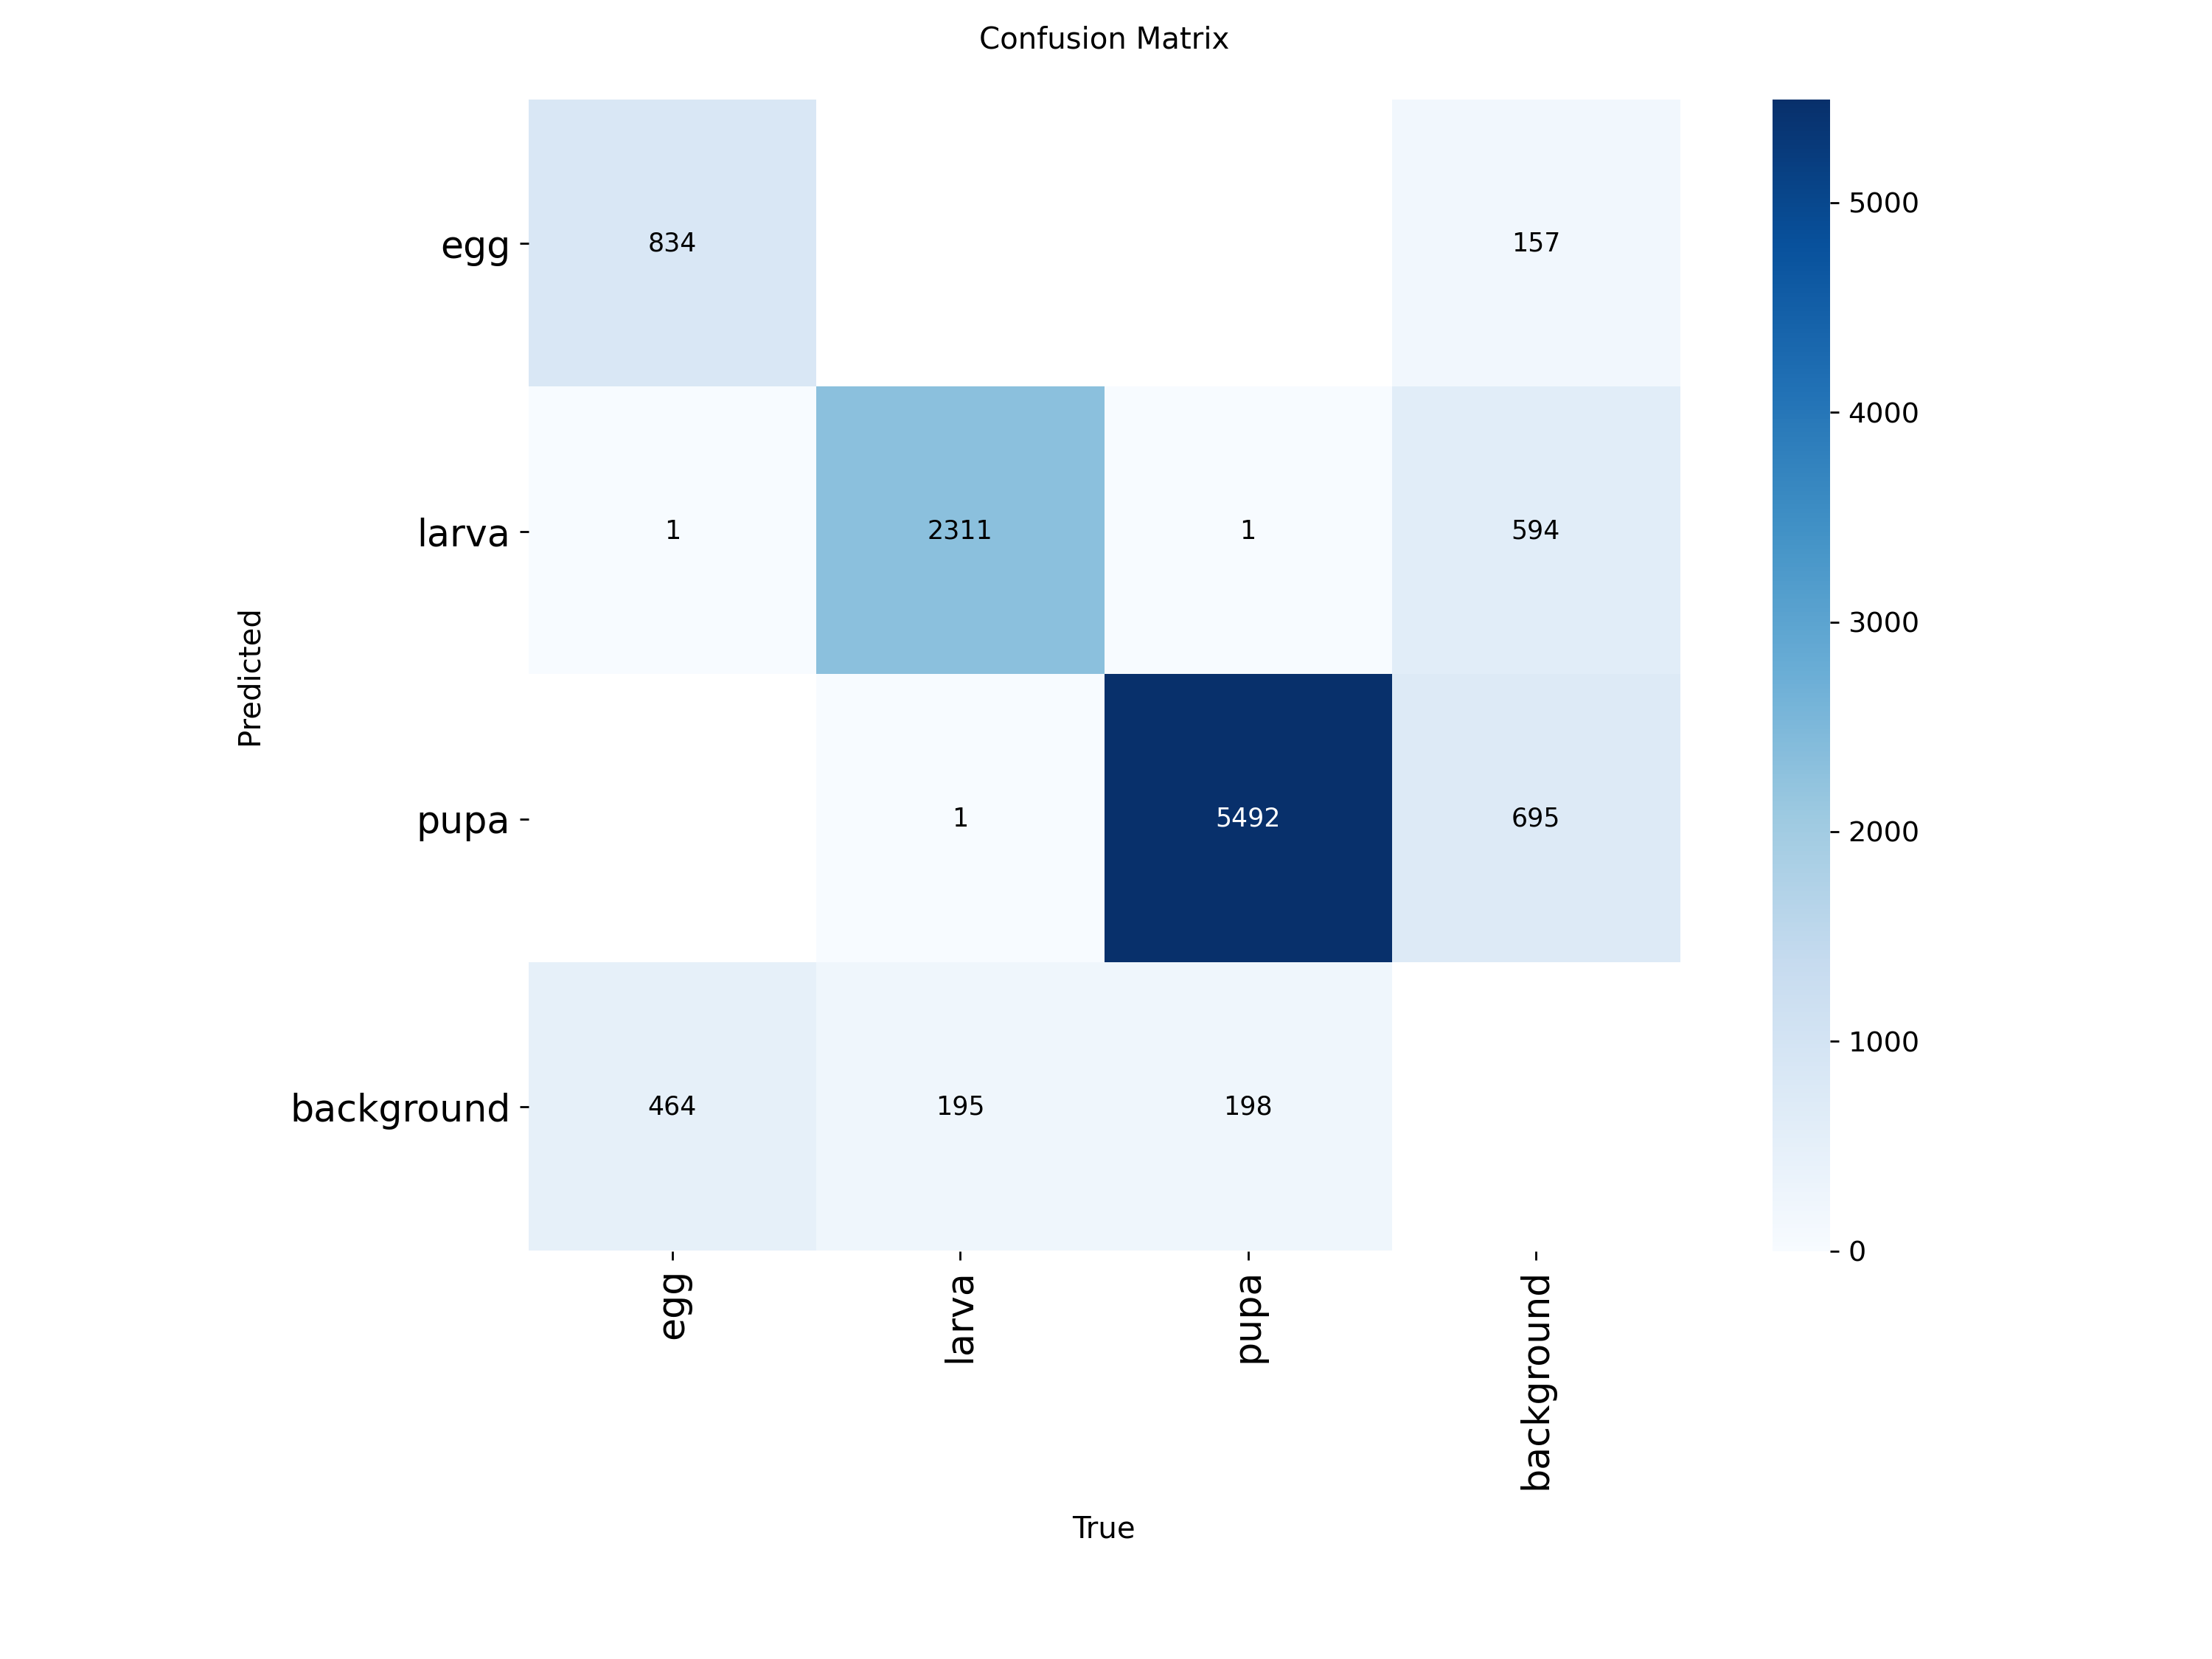

In [9]:
from IPython.display import Image, display
display(Image(filename="/kaggle/working/runs/detect/train/confusion_matrix.png", width=900))


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")  # YOLO detect CSV

plt.style.use("default")
plt.figure(figsize=(10,5), facecolor="white")
ax = plt.gca()
ax.set_facecolor("white")

neon_colors = [
    "#FF1744",  # Box
    "#00E5FF",  # Class
    "#FFD600",  # DFL
]

plt.plot(df["train/box_loss"], label="Train Box Loss", linewidth=2.2, color=neon_colors[0])
plt.plot(df["val/box_loss"], label="Val Box Loss", linestyle="--", linewidth=2.2, color=neon_colors[0])

plt.plot(df["train/cls_loss"], label="Train Class Loss", linewidth=2.2, color=neon_colors[1])
plt.plot(df["val/cls_loss"], label="Val Class Loss", linestyle="--", linewidth=2.2, color=neon_colors[1])

plt.plot(df["train/dfl_loss"], label="Train DFL Loss", linewidth=2.2, color=neon_colors[2])
plt.plot(df["val/dfl_loss"], label="Val DFL Loss", linestyle="--", linewidth=2.2, color=neon_colors[2])

plt.title("YOLOv11 Detect — Training vs Validation Loss", fontsize=18, color="black")
plt.xlabel("Epochs", fontsize=14, color="black")
plt.ylabel("Loss", fontsize=14, color="black")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.grid(alpha=0.3, linestyle="--", color="gray")
plt.legend(fontsize=11, frameon=False, labelcolor="black", loc="upper right")
plt.tight_layout()
plt.show()


TypeError: Cannot convert numpy.ndarray to numpy.ndarray

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load YOLO detection results
df = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")

epochs = df.index + 1

# Extract losses
train_box = df["train/box_loss"]
val_box   = df["val/box_loss"]

train_cls = df["train/cls_loss"]
val_cls   = df["val/cls_loss"]

train_dfl = df["train/dfl_loss"]
val_dfl   = df["val/dfl_loss"]

plt.style.use("default")
plt.figure(figsize=(10,5), facecolor="white")
ax = plt.gca()
ax.set_facecolor("white")

# Neon-like colors
colors = ["#FF1744", "#00E5FF", "#FFD600"]

# Plot box loss
plt.plot(epochs, train_box, label="Train Box Loss", color=colors[0], linewidth=2)
plt.plot(epochs, val_box, label="Val Box Loss", color=colors[0], linewidth=2, linestyle="--")

# Plot class loss
plt.plot(epochs, train_cls, label="Train Class Loss", color=colors[1], linewidth=2)
plt.plot(epochs, val_cls, label="Val Class Loss", color=colors[1], linewidth=2, linestyle="--")

# Plot DFL loss
plt.plot(epochs, train_dfl, label="Train DFL Loss", color=colors[2], linewidth=2)
plt.plot(epochs, val_dfl, label="Val DFL Loss", color=colors[2], linewidth=2, linestyle="--")

# Labels and title
plt.xlabel("Epochs", fontsize=14, color="black")
plt.ylabel("Loss", fontsize=14, color="black")
plt.title("YOLOv11 Detect — Learning Curves", fontsize=16, color="black")

# Grid and legend
plt.grid(alpha=0.3, linestyle="--", color="gray")
plt.legend(fontsize=11, frameon=False, labelcolor="black", loc="upper right")

plt.tight_layout()
plt.show()


TypeError: Cannot convert numpy.ndarray to numpy.ndarray